In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [68]:
df = pd.read_csv("Dataset.csv")

## EDA

In [69]:
df.head()

EventId  DER_mass_MMC  ...    Weight  Label
0   100000       138.470  ...  0.002653      s
1   100001       160.937  ...  2.233584      b
2   100002      -999.000  ...  2.347389      b
3   100003       143.905  ...  5.446378      b
4   100004       175.864  ...  6.245333      b

[5 rows x 33 columns]

In [70]:
df.shape

(250000, 33)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [72]:
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [73]:
df_nan = df[df["PRI_jet_subleading_pt"] != -999.000]
df_nan = df_nan[df_nan["DER_mass_MMC"] != -999.000]

In [74]:
df_nan.shape

(68114, 33)

In [75]:
df.describe()

EventId   DER_mass_MMC  ...  PRI_jet_all_pt         Weight
count  250000.000000  250000.000000  ...   250000.000000  250000.000000
mean   224999.500000     -49.023079  ...       73.064591       1.646767
std     72168.927986     406.345647  ...       98.015662       1.875103
min    100000.000000    -999.000000  ...        0.000000       0.001502
25%    162499.750000      78.100750  ...        0.000000       0.018636
50%    224999.500000     105.012000  ...       40.512500       1.156188
75%    287499.250000     130.606250  ...      109.933750       2.404128
max    349999.000000    1192.026000  ...     1633.433000       7.822543

[8 rows x 32 columns]

In [76]:
df_nan.describe()

EventId  DER_mass_MMC  ...  PRI_jet_all_pt        Weight
count   68114.000000  68114.000000  ...    68114.000000  68114.000000
mean   225035.224154    122.816184  ...      183.374631      0.445788
std     72243.940540     60.751559  ...      108.312736      0.747552
min    100000.000000      9.878000  ...       60.223000      0.001502
25%    162349.750000     93.320250  ...      109.472000      0.001503
50%    225288.000000    113.230000  ...      154.136500      0.064061
75%    287772.750000    133.455750  ...      223.595250      0.744056
max    349994.000000    988.199000  ...     1633.433000      7.805035

[8 rows x 32 columns]

In [77]:
df_nan.shape

(68114, 33)

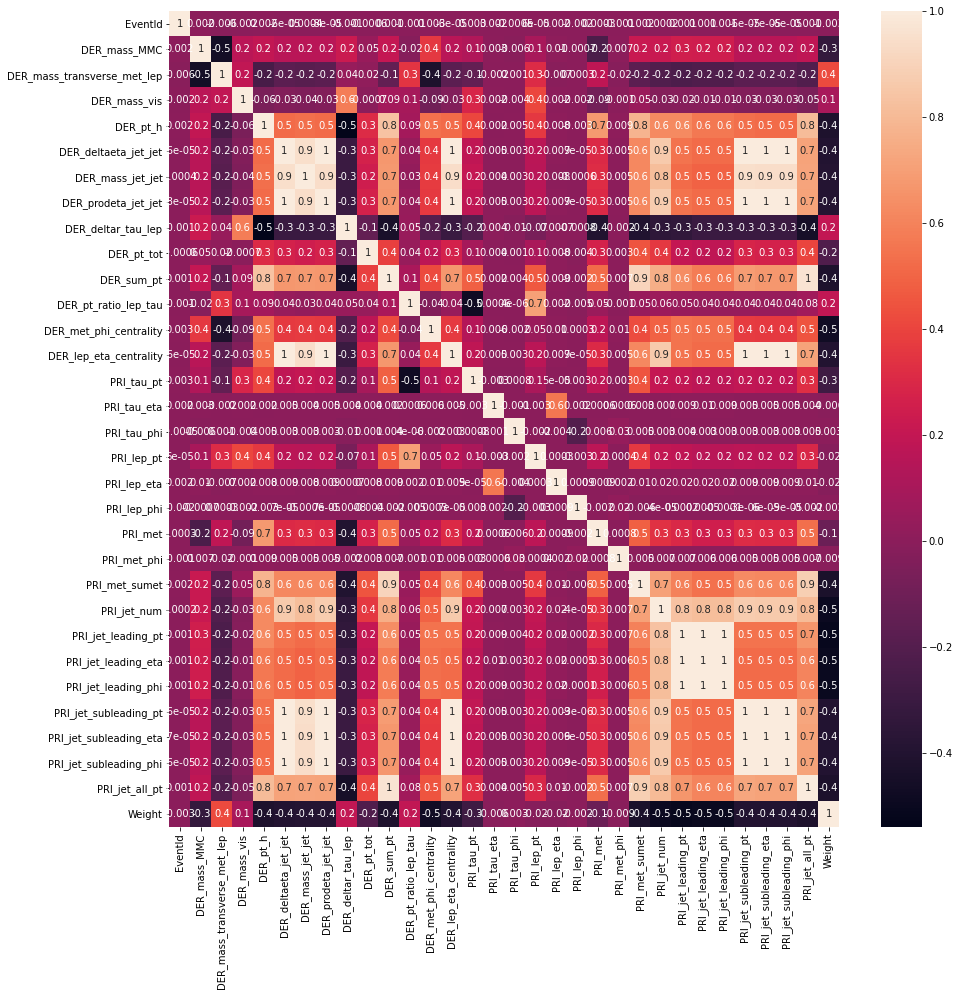

In [78]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt = '0.1g',ax=ax)

In [79]:
df_dr = df.drop(["PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_phi","DER_deltaeta_jet_jet","DER_lep_eta_centrality","DER_sum_pt"],axis = 1)
df_dnan = df_nan.drop(["PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_eta","PRI_jet_subleading_phi","DER_deltaeta_jet_jet","DER_lep_eta_centrality","DER_sum_pt"],axis = 1)

In [80]:
# make a copy of dataframe
scaled_features = df_dnan.copy()

scaled_features = scaled_features.drop(['Label','EventId'],axis = 1)
col_names = scaled_features.columns
features = scaled_features[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = RobustScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_names] = features

In [81]:
eda = scaled_features.sample(1000)

In [82]:
eda["PRI_jet_subleading_pt"].head()

170880    0.230339
81313    -0.261401
219605   -0.482316
41335    -0.083795
167555    0.000998
Name: PRI_jet_subleading_pt, dtype: float64

In [83]:
pri = []
der = []
for i in df_dnan.columns:
  if "PRI" in i:
    pri.append(i)
  else:
    der.append(i)

In [84]:
df_pri = df_dnan[pri].drop(["PRI_jet_num"],axis = 1)
df_der = df_dnan[der].drop(["EventId","Label"],axis = 1)

In [85]:
df_pri = df_pri.sample(1000)
df_der = df_der.sample(1000)

In [86]:
df_pri.head()

PRI_tau_pt  PRI_tau_eta  ...  PRI_jet_subleading_pt  PRI_jet_all_pt
138415     102.586       -0.867  ...                 44.205         125.237
231057      35.404        1.168  ...                 34.823         130.926
185637      69.092        1.019  ...                 30.705         170.389
170495      81.710       -0.028  ...                 57.261         164.201
63087      245.477        0.280  ...                128.124         546.367

[5 rows x 12 columns]

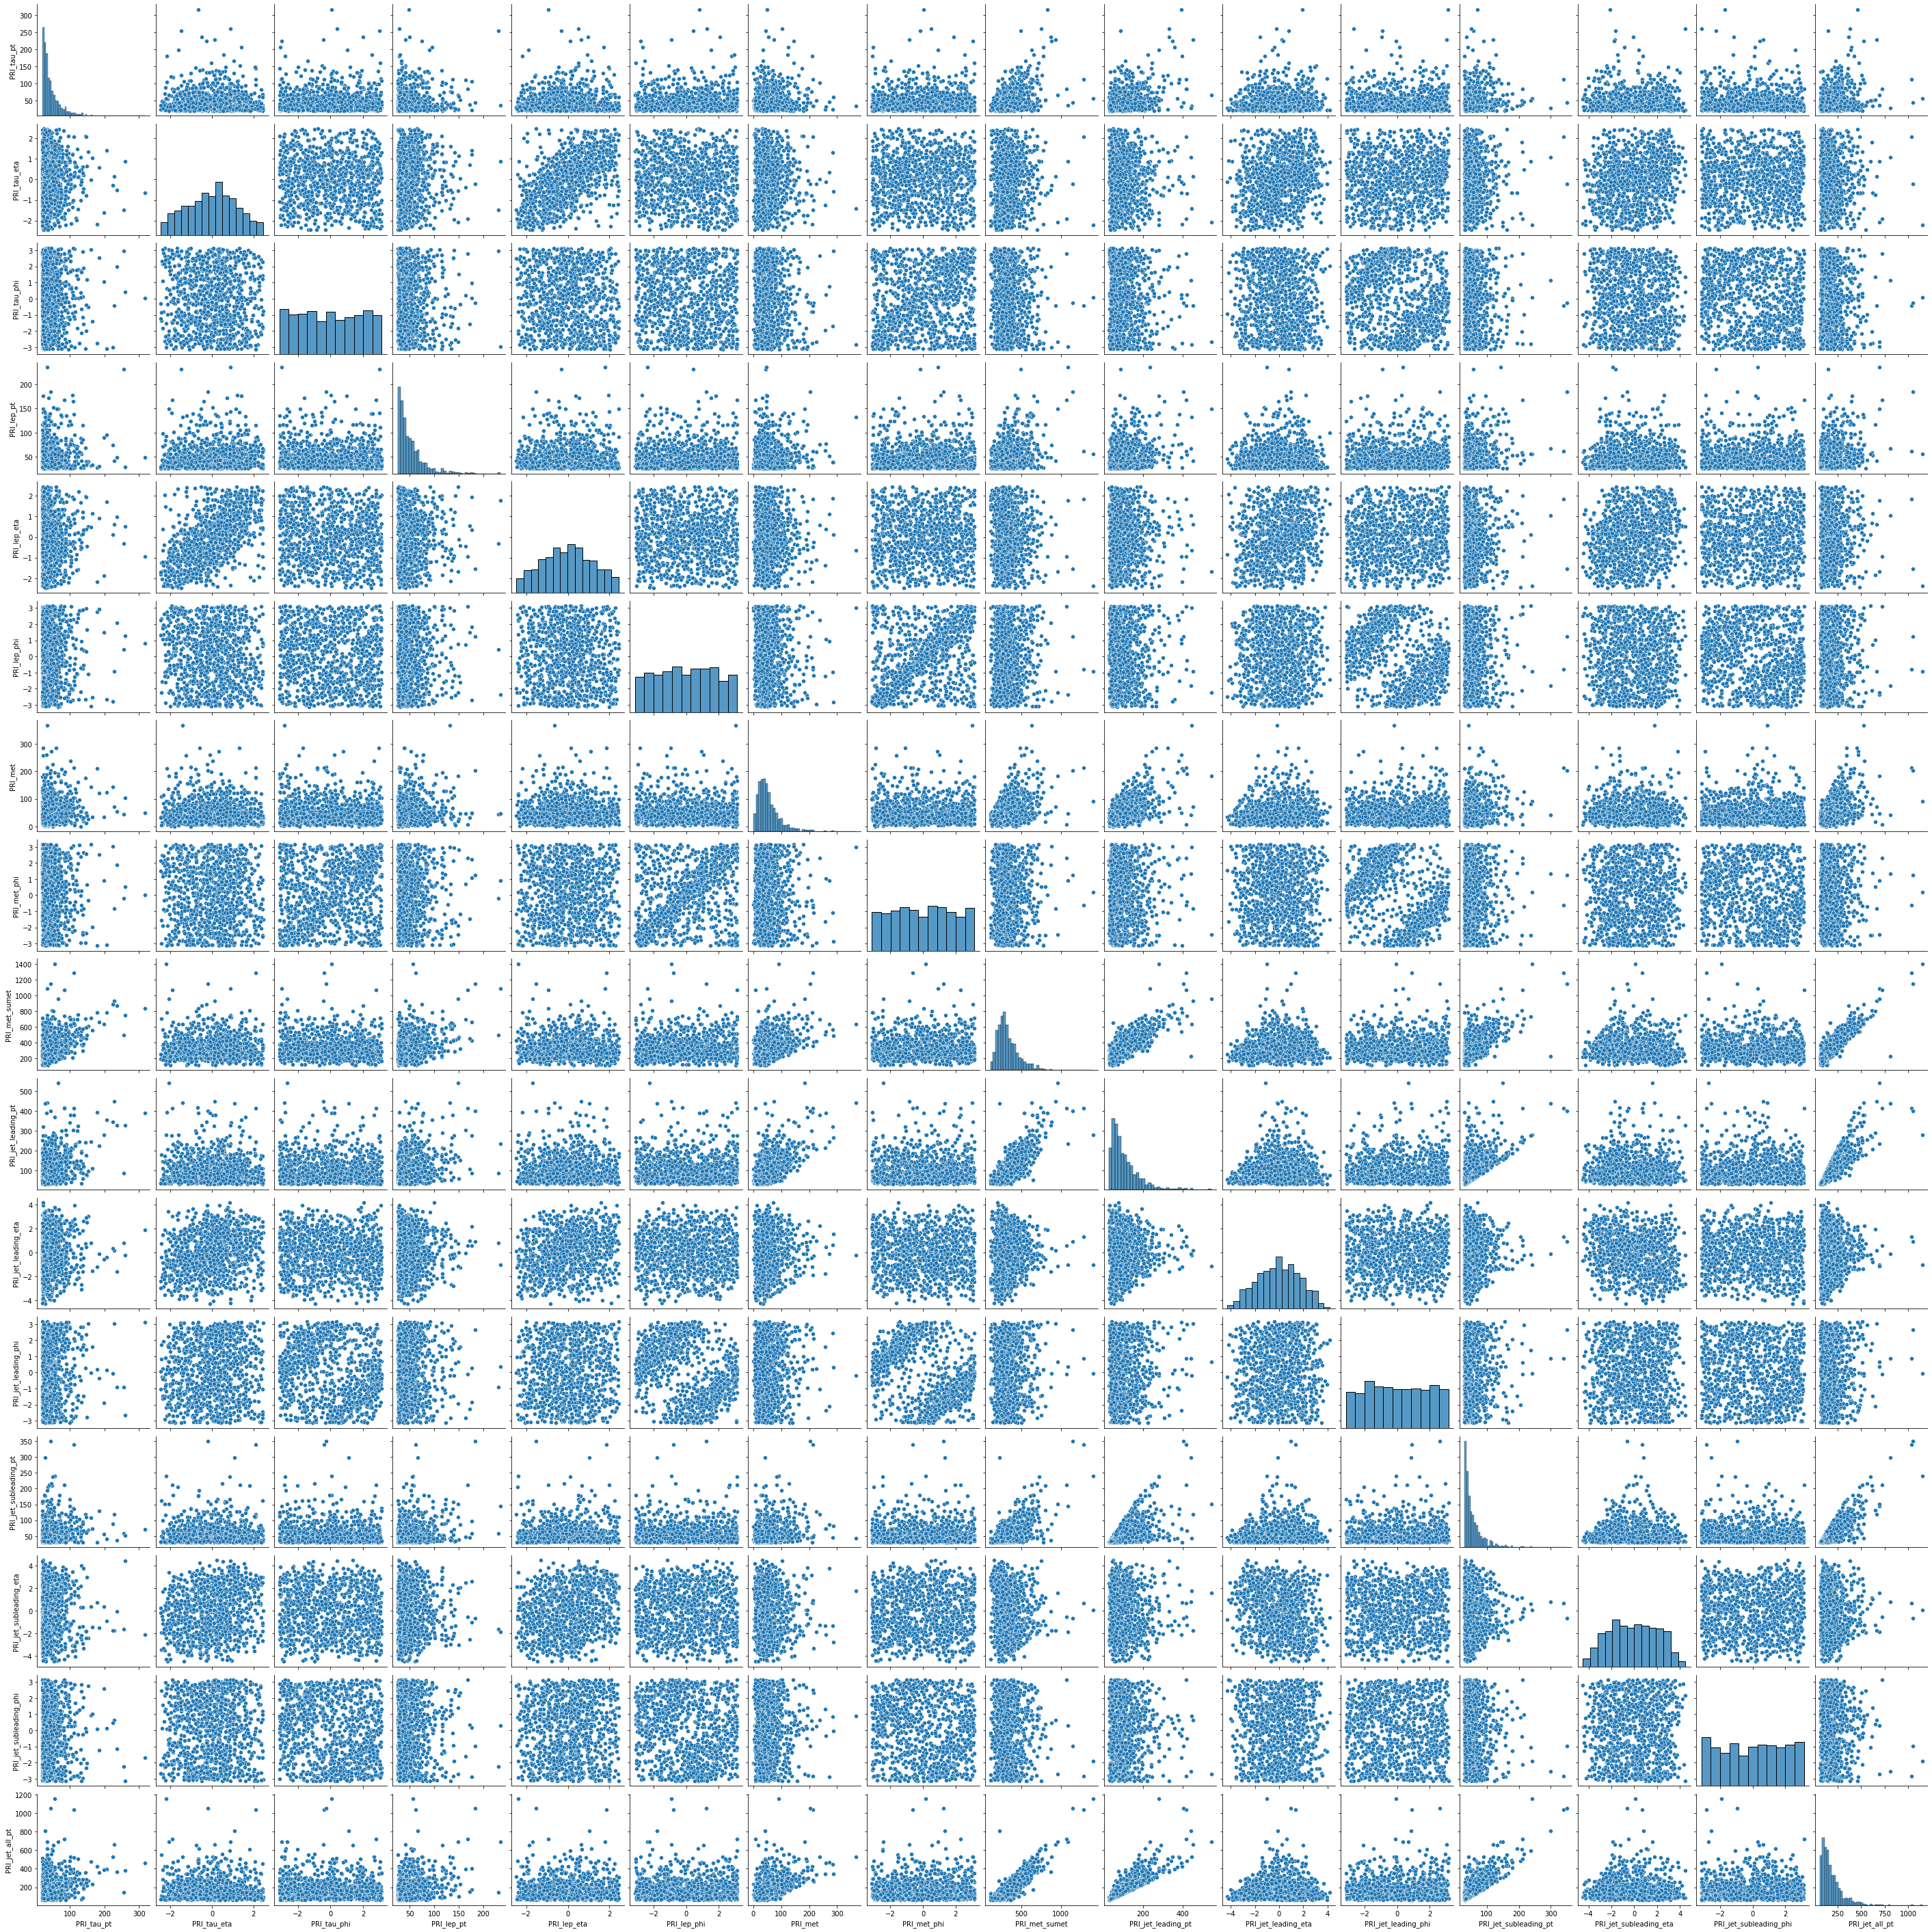

In [ ]:
sns.pairplot(df_pri)

In [ ]:
df_pri.shape

(1000, 12)

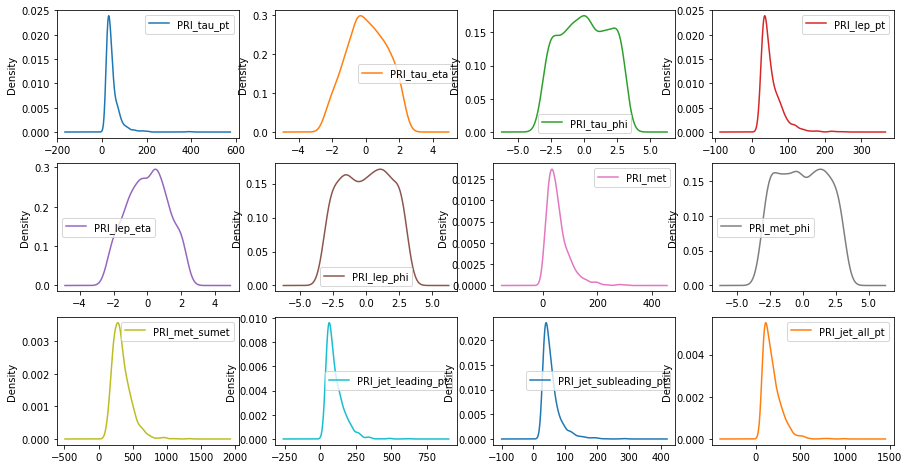

In [ ]:
df_pri.plot(kind='density', subplots=True, layout=(3,4), sharex=False,figsize=(15,8))
plt.show()

## PRE-PROCESSING

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

In [88]:
data = df_dr.replace(-999,np.nan)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 211886 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_mass_jet_jet             72543 non-null   float64
 6   DER_prodeta_jet_jet          72543 non-null   float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_pt_ratio_lep_tau         250000 non-null  float64
 10  DER_met_phi_centrality       250000 non-null  float64
 11  PRI_tau_pt                   250000 non-null  float64
 12  PRI_tau_eta                  250000 non-null  float64
 13 

In [90]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')

In [91]:
labels = data.pop("Label")

In [92]:
le = LabelEncoder()
le.fit(labels)
classes = le.transform(labels)

In [93]:
le.inverse_transform([0,1])

array(['b', 's'], dtype=object)

In [94]:
data = imp.fit_transform(data)

In [95]:
df_dr.head(20)

EventId  DER_mass_MMC  ...    Weight  Label
0    100000       138.470  ...  0.002653      s
1    100001       160.937  ...  2.233584      b
2    100002      -999.000  ...  2.347389      b
3    100003       143.905  ...  5.446378      b
4    100004       175.864  ...  6.245333      b
5    100005        89.744  ...  0.083414      b
6    100006       148.754  ...  0.002653      s
7    100007       154.916  ...  0.018636      s
8    100008       105.594  ...  5.296003      b
9    100009       128.053  ...  0.001502      s
10   100010      -999.000  ...  2.299504      b
11   100011       114.744  ...  0.307170      b
12   100012       145.297  ...  1.681611      b
13   100013        82.488  ...  2.183892      b
14   100014      -999.000  ...  2.151199      b
15   100015       111.026  ...  0.018636      s
16   100016       114.256  ...  1.454848      b
17   100017       127.861  ...  0.001503      s
18   100018      -999.000  ...  5.121624      b
19   100019      -999.000  ...  5.979351      b

[20 rows x 26 columns]

In [96]:
df_imputed = pd.DataFrame(data,columns = df_dr.columns[:-1])

In [97]:
data.shape

(250000, 25)

In [98]:
selector = SelectKBest(f_classif, k=10)
selector.fit(data, classes)
X = selector.transform(data)

In [99]:
features = selector.get_support()
columns = df_dr.columns
selected_features = []
for i in range(len(columns)-1):
  if features[i]:
    selected_features.append(columns[i])

In [100]:
print(selected_features)

['DER_mass_transverse_met_lep', 'DER_pt_h', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_met_sumet', 'PRI_jet_all_pt', 'Weight']


In [101]:
df_selected = df_imputed[selected_features]
df_sel = df_dr[selected_features]
imputed_values = []
for i in range(len(selected_features)):
  df_temp = df_sel[df_sel[selected_features[i]] == -999]
  if len(df_temp.index) == 0:
    imputed_values.append(0)
  else:
    j = df_temp.index[0]
    imputed_values.append(df_selected[selected_features[i]][j])

In [102]:
imputed_values

[0, 0, 225.885, -0.244, 0, 0, 0, 0, 0, 0]

In [103]:
df_selected['DER_mass_jet_jet'][0]

124.711

## MODEL CREATION

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from sklearn.model_selection import train_test_split
from keras.layers.core import Dropout
from sklearn.metrics import  classification_report,recall_score
from sklearn.metrics import  confusion_matrix

In [24]:
def base_model():
  model = Sequential([
    Dense(units = 64, input_shape =(10,),activation = 'relu'),
    Dropout(0.2),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')])
  model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy",metrics=['accuracy'])
  return model

In [25]:
number_of_rows = data.shape[0]
random_indices = np.random.choice(number_of_rows, size=50000, replace=False)
data1 = X[random_indices,:]
class1 = classes[random_indices]

In [26]:
model = base_model()
X_train,X_val,y_train,y_val = train_test_split(X,classes,test_size=0.4)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size=0.5)

In [27]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=30)

Epoch 1/30
4688/4688 [==============================] - 9s 2ms/step - loss: 0.7360 - accuracy: 0.7792 - val_loss: 0.2342 - val_accuracy: 0.9139
Epoch 2/30
4688/4688 [==============================] - 8s 2ms/step - loss: 0.2063 - accuracy: 0.9161 - val_loss: 0.1460 - val_accuracy: 0.9434
Epoch 3/30
4688/4688 [==============================] - 10s 2ms/step - loss: 0.1623 - accuracy: 0.9316 - val_loss: 0.1568 - val_accuracy: 0.9309
Epoch 4/30
4688/4688 [==============================] - 8s 2ms/step - loss: 0.1436 - accuracy: 0.9409 - val_loss: 0.1381 - val_accuracy: 0.9459
Epoch 5/30
4688/4688 [==============================] - 9s 2ms/step - loss: 0.1301 - accuracy: 0.9488 - val_loss: 0.0501 - val_accuracy: 0.9849
Epoch 6/30
4688/4688 [==============================] - 9s 2ms/step - loss: 0.1306 - accuracy: 0.9477 - val_loss: 0.1164 - val_accuracy: 0.9471
Epoch 7/30
4688/4688 [==============================] - 8s 2ms/step - loss: 0.1236 - accuracy: 0.9518 - val_loss: 0.1187 - val_accuracy

In [28]:
y = model.predict(X_test)
y_pred = y.argmax(axis = 1)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     32847
           1       0.98      1.00      0.99     17153

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000

[[32510   337]
 [    1 17152]]


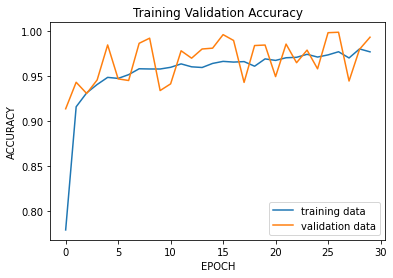

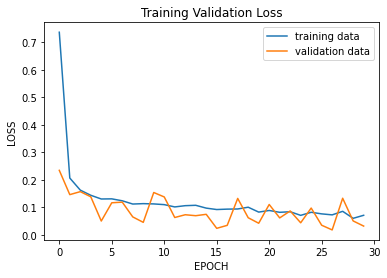

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Validation Accuracy')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend(['training data', 'validation data'])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Validation Loss')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend(['training data', 'validation data'])
plt.show()

In [30]:
tf.keras.models.save_model(model,'Higgs_Boson.h5')